In [2]:
%%capture --no-stderr
%pip install --quiet -U langgraph


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [4]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

def node_4(state):
    print("---Node 4---")
    return {"graph_state": state['graph_state'] +" But I'm working on it."}

def node_5(state):
    print("---Node 5---")
    return {"graph_state": state['graph_state'] +" & I really need some help."}

In [5]:
import random
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"
    
    # 50% of the time, we return Node 3
    return "node_3"

def decide_mood_2(state) -> Literal["node_4", "node_5"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_4"
    
    # 50% of the time, we return Node 3
    return "node_5"

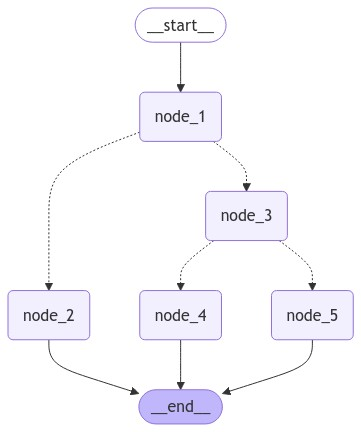

In [7]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
#builder.add_edge("node_3", END)
builder.add_conditional_edges("node_3", decide_mood_2)
builder.add_edge("node_4", END)
builder.add_edge("node_5", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

---Node 1---
---Node 3---
---Node 5---


{'graph_state': 'Hi, this is Lance. I am sad! & I really need some help.'}